We analyze the pore sizes of our gels by artifically putting growing particles into the gel at random positions one by one and removing them again after they reached their maximum size determined by the steepest descent algorithm unable to reduce the overlap between artificial particle and gel beads any further. This is a good indicator about the size of pores in the gel

We need knowledge about this to determine how many MNPs of which size can even fit into the produced gels and where these MNPs may end up inside the gel

The below script analyzes how large the pores are in relation to various config parameters (such as meshw and force field), where which kind of pores (kind=size of pore) are distributed.

The results are interesting to say the least.

In [1]:
import sys

sys.path.append("../")

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.patches
import matplotlib.pyplot as plt

import common
import analysis
import analysis.network
import analysis.distribution

In [3]:
root_dir = Path("../../data/raw/30112024_forcefield_eq_time_fixed/")

analyzed_gel_dirs = [p.parent.parent.parent for p in root_dir.rglob("pore_sizes.npy")]
print(len(analyzed_gel_dirs), "of", len(list(root_dir.iterdir())), "gel dirs analyzed")

gel_dir = common.GelDir(analyzed_gel_dirs[0])
print(gel_dir.path.relative_to(root_dir))

pore_sizes = np.load(gel_dir.path / "processed/pores/pore_sizes.npy")
probe_points = np.load(gel_dir.path / "processed/pores/probe_points.npy")
final_part_positions = np.load(gel_dir.path / "processed/pores/final_part_positions.npy")

print(pore_sizes.shape, probe_points.shape, final_part_positions.shape)

73 of 270 gel dirs analyzed
run=3_ff=exp_charge=0.05_vf=0.45_crosslink=0.7
(100,) (100, 3) (100, 4200, 3)


In [4]:
bead_points = np.load(gel_dir.beads_gel_eq()["path"].iloc[-1])
distances = np.full(len(bead_points), 0)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

axs[0].set_title("Probe Particle Sizes - 2D Projection")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

for c, s, final_points in zip(probe_points, pore_sizes, final_part_positions):
    circle = matplotlib.patches.Circle((c[0], c[1]), radius=s, color="r", alpha=0.2)
    distances = np.maximum(distances, np.linalg.norm(bead_points - final_points, axis=1))
    axs[0].add_patch(circle)
# axs[0].scatter(*bead_points[:, :2].T, alpha=0.4, c=distances, zorder=-10)
axs[0].scatter(*bead_points[:, :2].T, alpha=1.0, s=200, color="black", zorder=-10, edgecolor="none")
# axs[0].scatter(*probe_points[:, :2].T, marker=".", color="r")
axs[0].set_aspect("equal")


axs[1].set_title("Relative Particle Sizes - 2D Projection")
axs[1].set_xlabel("x")
axs[1].scatter(*bead_points[:, :2].T, alpha=1.0, s=200, color="black", zorder=-10, edgecolor="none")
axs[1].scatter(*probe_points[:, :2].T, alpha=0.4, s=pore_sizes * 50, color="C1")
axs[1].set_aspect("equal")

plt.tight_layout()
plt.show()

In [5]:
# for size, sub_df in pore_df.groupby("size"):
#     plt.boxplot(sub_df["distance"], positions=[size])

In [6]:
records = []
for c, s, final_points in zip(probe_points, pore_sizes, final_part_positions):
    max_steepest_descent_change = np.max(np.linalg.norm(bead_points - final_points, axis=1))
    com = np.mean(final_points[:-1], axis=0)
    records.append(dict(distance=np.linalg.norm(com - c), max_steepest_descent_change=max_steepest_descent_change))

pore_df = pd.DataFrame.from_records(records)
pore_df["size"] = pore_sizes
pore_df

distance  max_steepest_descent_change      size
0   10.505927                     2.971406  3.450800
1   12.381055                     3.024765  3.471842
2    6.352455                     2.424177  2.548391
3   14.358432                     1.312250  3.889815
4    4.977991                     0.311769  0.631777
..        ...                          ...       ...
95  10.725900                     1.862148  2.352473
96   3.512857                     2.471974  2.189145
97  11.676639                     3.099256  3.402930
98  10.288231                     2.471060  2.596157
99  11.298179                     2.121969  2.970290

[100 rows x 3 columns]

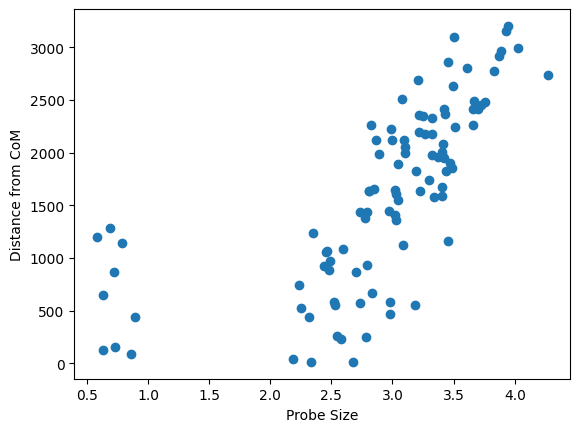

In [7]:
# fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
fig, axs = plt.subplots()
axs.scatter(pore_df["size"], pore_df["distance"]**3)
axs.set_xlabel("Probe Size")
axs.set_ylabel("Distance from CoM")

plt.show()

In [8]:
# fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

# axs[0].set_title("Pore Size over Distance")
# axs[0].set_xlabel("Probe Particle Size")
# axs[0].set_ylabel("Distance from Gel CoM")
# for size, sub_df in pore_df.groupby("size"):
#     axs[0].boxplot(sub_df["distance"], positions=[size])
#     axs[1].boxplot(sub_df["max_steepest_descent_change"], positions=[size])
# # for i, (size, sub_df) in enumerate(pore_df.groupby("size")):
# #     axs[0].plot(size, sub_df["distance"].mean(), "o", color="C0", label="Mean" if i == 0 else "")
# #     axs[0].plot(size, sub_df["distance"].median(), "o", color="C1", label="Median" if i == 0 else "")
# #     axs[1].plot(size, sub_df["max_steepest_descent_change"].mean(), "o", color="C0", label="Mean" if i == 0 else "")
# #     axs[1].plot(size, sub_df["max_steepest_descent_change"].median(), "o", color="C1", label="Median" if i == 0 else "")
# # axs[0].plot(pore_df["size"], pore_df["distance"], "k.", zorder=-10)
# # axs[0].legend()

# axs[1].set_title("SD Change over Probe Size")
# axs[1].set_xlabel("Probe Particle Size")
# axs[1].set_ylabel("Max. SD Change")
# # axs[1].plot(pore_df["size"], pore_df["max_steepest_descent_change"], "k.", zorder=-10)
# # axs[1].legend()


# rnd_result = analysis.distribution.compute_radial_number_density(
#     probe_points, relative_to=np.mean(bead_points, axis=0), use_multi_bin_smooth=True
# )
# axs[2].set_title("Probe Points Density")
# axs[2].set_xlabel("Distance from Gel CoM")
# axs[2].set_ylabel("Radial Number Density")
# axs[2].plot(rnd_result.r, rnd_result.number_density, "k-")

# plt.tight_layout()
# plt.show()

# All Gels

In [9]:
records = []
for gel_dir in map(common.GelDir, analyzed_gel_dirs):
    pore_sizes = np.load(gel_dir.path / "processed/pores/pore_sizes.npy")
    probe_points = np.load(gel_dir.path / "processed/pores/probe_points.npy")
    com = np.load(gel_dir.beads_gel_eq()["path"].iloc[-1]).mean(axis=0)

    for c, s in zip(probe_points, pore_sizes):
        records.append(
            dict(
                size=s,
                distance=np.linalg.norm(com - c),
                probe_point=c,
                crosslink_percentage=gel_dir.config.crosslink_percentage,
                vf=gel_dir.config.volume_fraction,
                ff=gel_dir.config.agent_force_field,
                gel_dir=gel_dir,
            )
        )

all_gel_pores_df = pd.DataFrame.from_records(records)
display(all_gel_pores_df)

size   distance                                        probe_point  \
0     3.450800  10.505751  [55.59253001925622, 43.63209391404044, 56.2878...   
1     3.471842  12.373324  [50.121630426860776, 46.322928669660186, 62.42...   
2     2.548391   6.322161  [50.14149670980159, 44.46103218125524, 51.3313...   
3     3.889815  14.354556  [39.66038784304979, 41.507092714734725, 47.507...   
4     0.631777   5.059971  [45.68777303361961, 49.29548417721838, 48.8813...   
...        ...        ...                                                ...   
7295  2.353522   6.502553  [53.906277113494795, 47.81725072187844, 55.181...   
7296  2.447636   4.602561  [51.16331228059574, 47.74119030251715, 47.9553...   
7297  3.071775  10.913556  [54.455852808866815, 49.049371916623215, 40.96...   
7298  3.290108  12.834677  [44.89800171539015, 61.9335748140673, 46.45921...   
7299  2.761435   9.824953  [47.0403846242783, 52.278635695304, 41.7099888...   

      crosslink_percentage    vf    ff  \
0                      0.7  0.45   exp   
1                      0.7  0.45   exp   
2                      0.7  0.45   exp   
3                      0.7  0.45   exp   
4                      0.7  0.45   exp   
...                    ...   ...   ...   
7295                   0.7  0.45  none   
7296                   0.7  0.45  none   
7297                   0.7  0.45  none   
7298                   0.7  0.45  none   
7299                   0.7  0.45  none   

                                                gel_dir  
0     GelDir(path=PosixPath('../../data/raw/30112024...  
1     GelDir(path=PosixPath('../../data/raw/30112024...  
2     GelDir(path=PosixPath('../../data/raw/30112024...  
3     GelDir(path=PosixPath('../../data/raw/30112024...  
4     GelDir(path=PosixPath('../../data/raw/30112024...  
...                                                 ...  
7295  GelDir(path=PosixPath('../../data/raw/30112024...  
7296  GelDir(path=PosixPath('../../data/raw/30112024...  
7297  GelDir(path=PosixPath('../../data/raw/30112024...  
7298  GelDir(path=PosixPath('../../data/raw/30112024...  
7299  GelDir(path=PosixPath('../../data/raw/30112024...  

[7300 rows x 7 columns]

In [10]:
all_gel_pores_df["size_binned"] = np.digitize(all_gel_pores_df["size"], np.linspace(0, 10, 10))

In [11]:
import seaborn as sns


sns.relplot(
    all_gel_pores_df,
    kind="line",
    y="distance",
    x="size_binned",
    hue="ff",
    col="vf",
    row="crosslink_percentage",
    facet_kws=dict(margin_titles=True),
    err_style="band",
    errorbar=("ci", 80),
)

plt.show()

In [12]:
all_gel_pores_df["distance3"] = all_gel_pores_df["distance"]**3

0.2


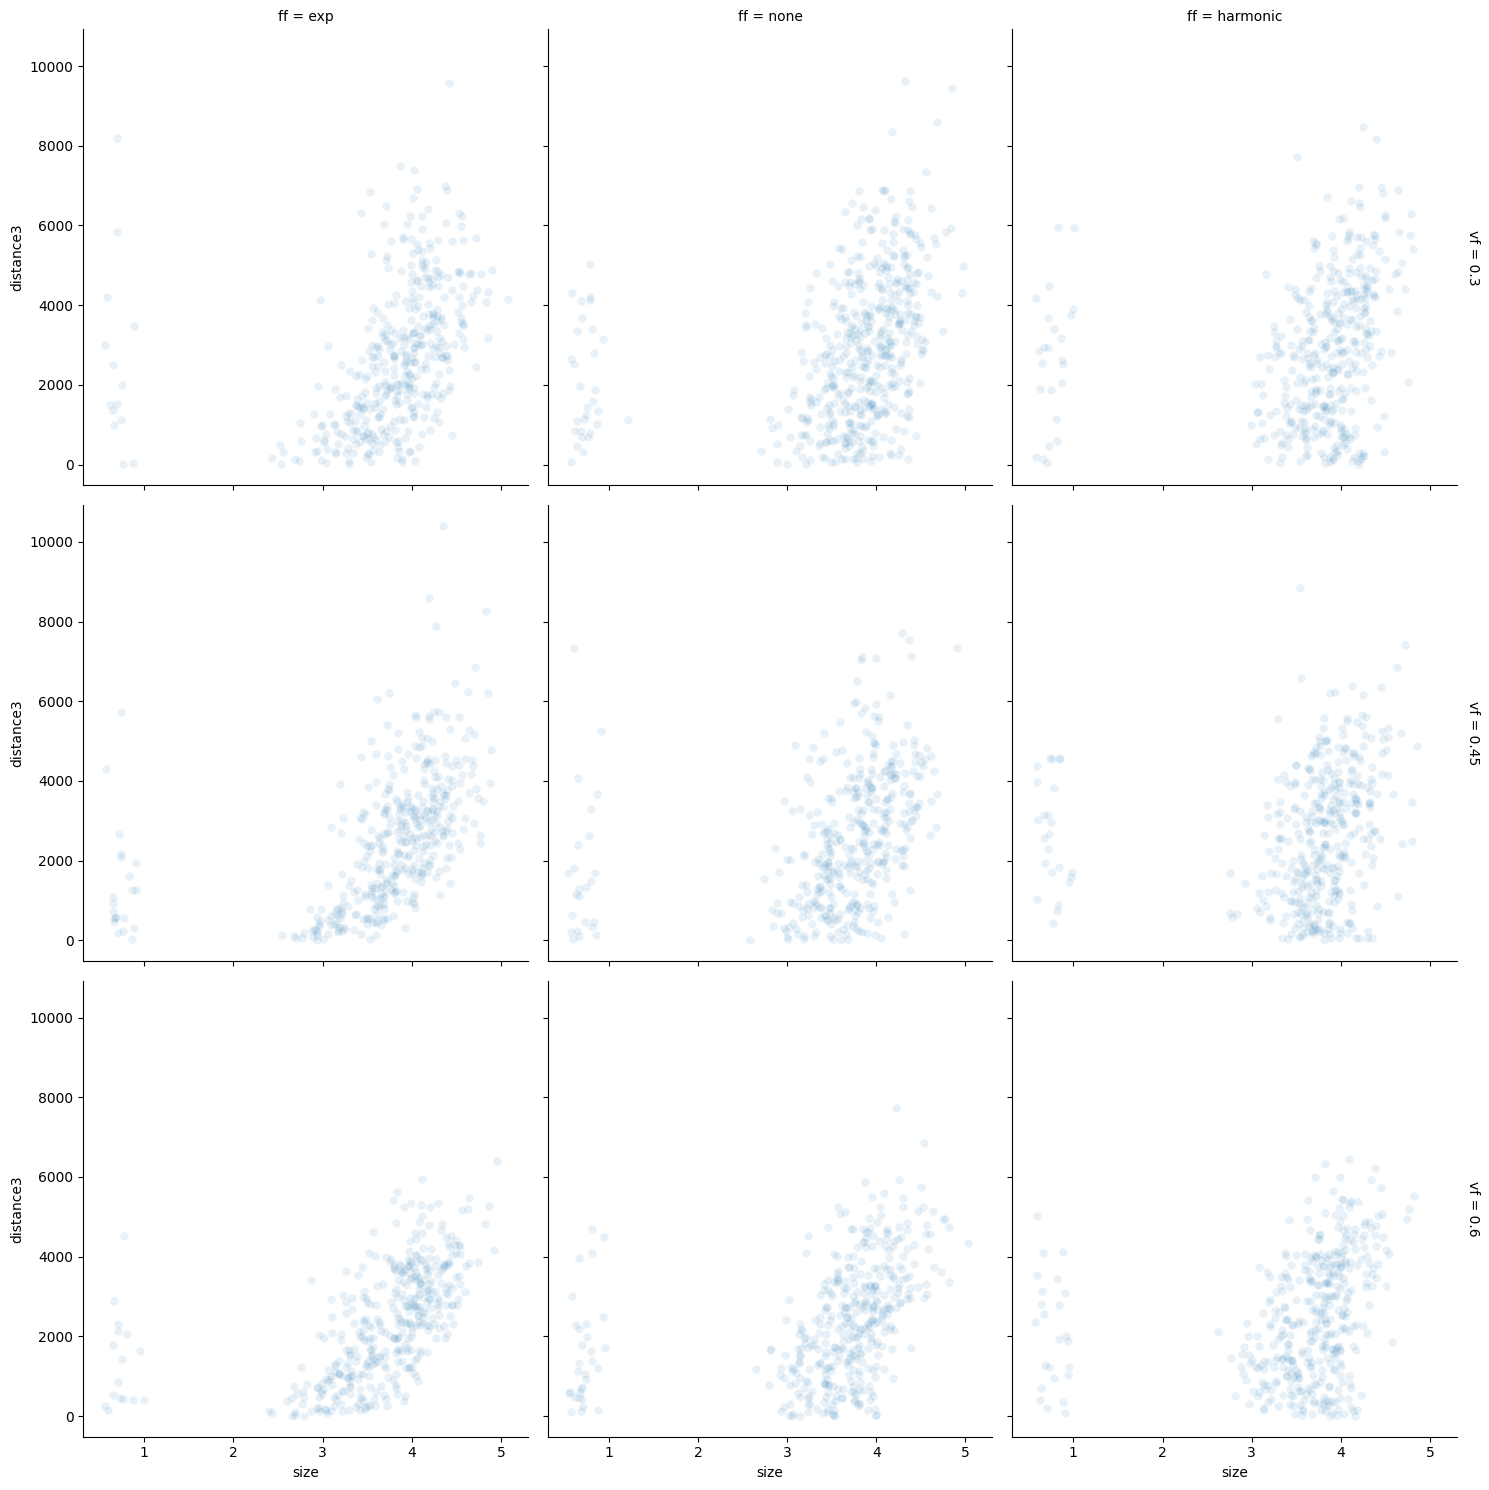

0.7


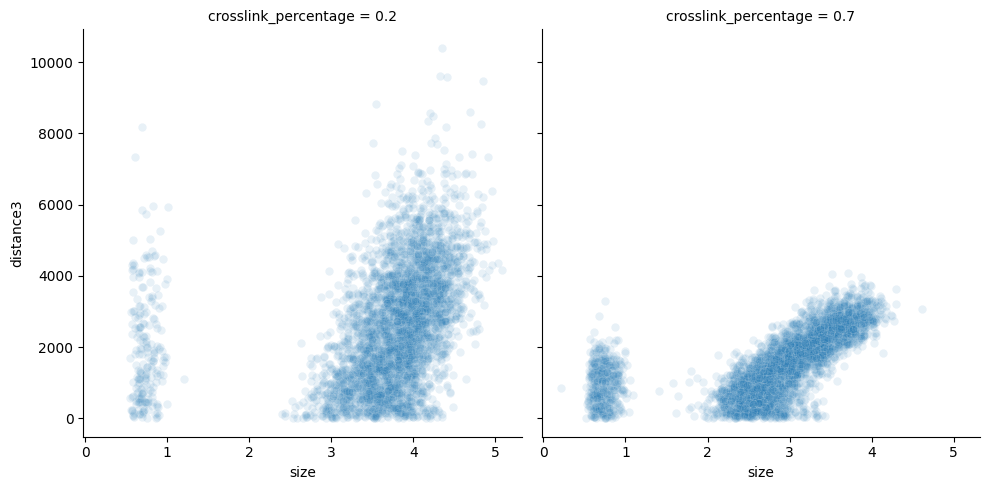

In [13]:
kwargs = dict(kind="scatter", x="size", y="distance3", facet_kws=dict(margin_titles=True), alpha=0.1)
for clp, sub_df in all_gel_pores_df.groupby("crosslink_percentage"):
    print(clp)
    sns.relplot(sub_df, col="vf", row="ff", **kwargs)  # type: ignore
    sns.relplot(sub_df, col="ff", row="vf", **kwargs)  # type: ignore
    plt.show()

sns.relplot(all_gel_pores_df, col="crosslink_percentage", **kwargs)  # type: ignore
plt.show()

### Overall Observation
- I get two distinct regions:
    1. small probes (size ~ 0.5 - 1.2) over the whole gel **except** the boundary
    2. medium to large probes (size ~ 2.0 - 5.0) also over the whole gel **including** the boundary
- Between these regions there is a gap with almost no probe sizes
    - 
- The larger cluster stops at a larger distance than the small cluster in both cases
    - The outer shell does not have whatever the reason for the small cluster is


### Effekt of Crosslink Percentage (aka. meshw)
- The gap with no probe sizes shrinks with increasing crosslink percentage (from [1.2, 3.0] to [1.2, 2.2])
    - So rather than shrinking this is more like the right cluster moves to the left
        - But only the lower part of the right cluster, which is why it becomes a sickle
    - So why does it move left?
        - The density (1/meshw) must be higher (even relatively) at the core for the higher crosslink percentage
        - But **only** at the core, outside, there is no shift and we get larger probes again

- The probes don't become as large for the higher crosslink percentage
    - Completely expected and desired since the meshw is smaller

- Smaller cluster has more points when crosslink percentage is higher
    - Why?
        - 

- Smaller cluster has a higher density at the top (larg distances) when crosslink percentage is higher
    - For low crosslink percentage the density is almost uniform
    - So why not for high crosslink percentage?
        - One obvious point is that the shells have a higher volume at larger distances and thus there are more points obviously
        - But the low crosslink percentage doesn't care about this fact apparently; at least not in the small cluster
        - So it has those points in the large cluster (where we can see the higher density for larger distances)
        - But actually, after checking the histograms, both follow the r**3 "law" (although the high crosslink percentage follows is much clearer, which I attribute to more samples)

- The clusters of the larger crosslink percentage stop at a smaller distance
    - Because the gels are obviously smaller

- The **large cluster** is **sharper** at the top for the higher crosslink percentage
    - I conclude that the reason for this is that the gel has a sharper boundary

### Effect of Force Field
- exp:
    - probes at center are smaller
    - small cluster is smaller and closer to center
- harmonic:
    - probes at center are slightly larger
    - probes at boundary are slightly smaller
- none:
    - no huge differences compared to harmonic

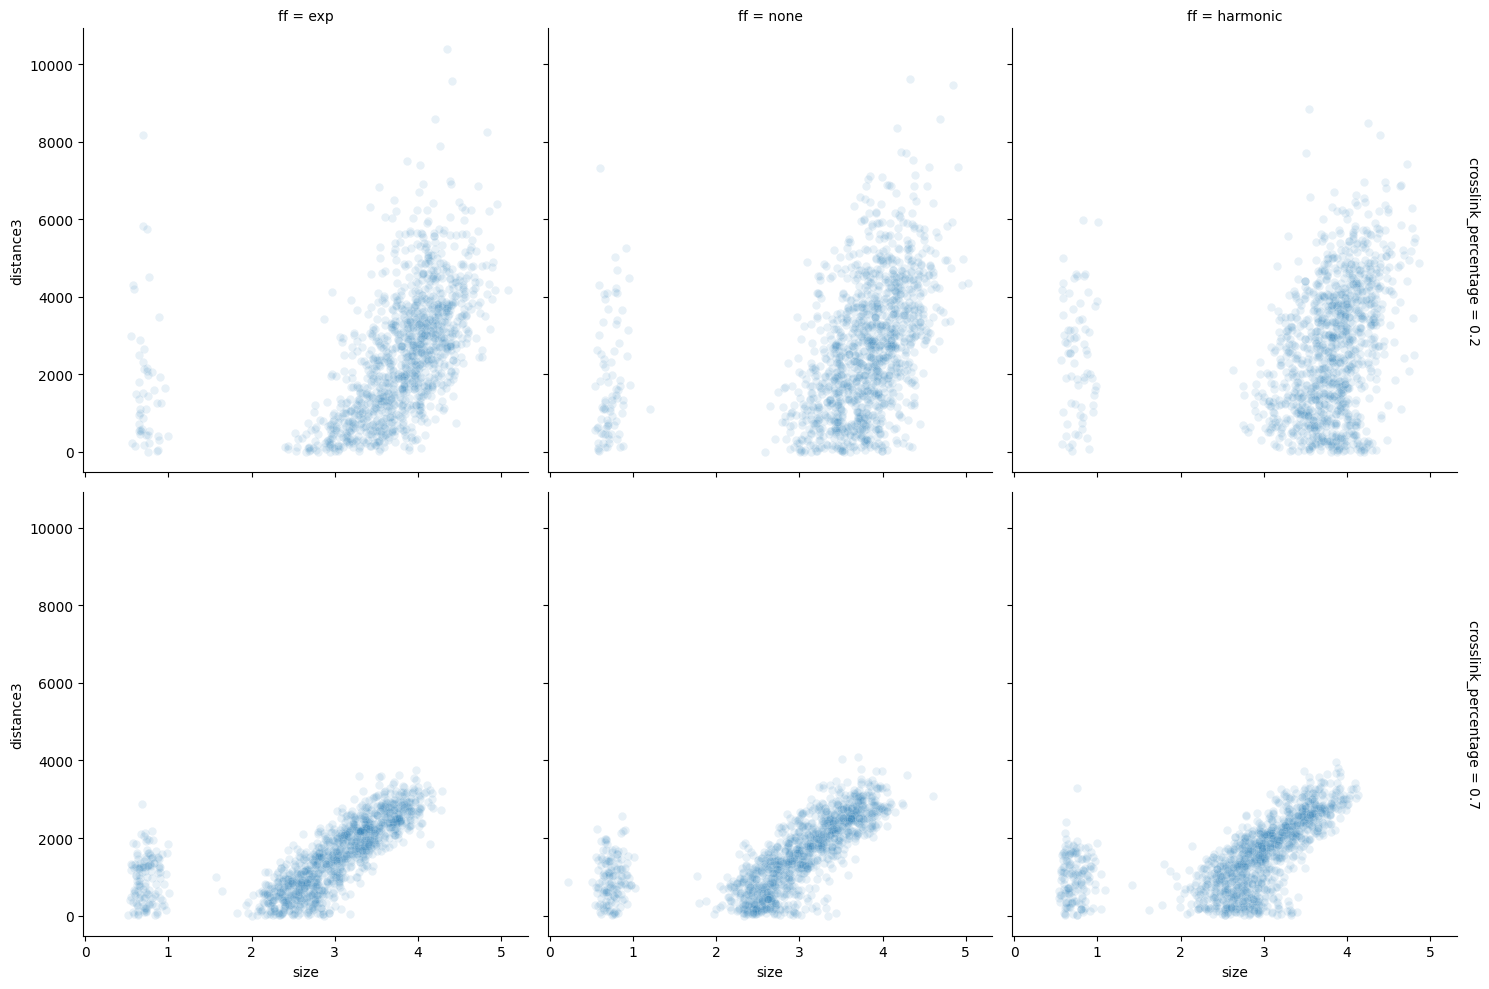

In [14]:
kwargs["y"] = "distance3"
sns.relplot(all_gel_pores_df, col="ff", row="crosslink_percentage", **kwargs)  # type: ignore

In [15]:
print(np.count_nonzero(all_gel_pores_df["size"] < 1.5), np.count_nonzero(all_gel_pores_df["size"] > 1.5))
print(np.count_nonzero(all_gel_pores_df["size"] < 1.5) / len(all_gel_pores_df)*100)

633 6667
8.67123287671233


In [16]:
all_gel_pores_df[["vf", "ff", "crosslink_percentage"]] = all_gel_pores_df[["vf", "ff", "crosslink_percentage"]].astype(
    "category"
)
all_gel_pores_df.dtypes

size                     float64
distance                 float64
probe_point               object
crosslink_percentage    category
vf                      category
ff                      category
gel_dir                   object
size_binned                int64
distance3                float64
dtype: object

In [17]:
all_gel_pores_df["seed"] = [gel_dir.config.seed for gel_dir in all_gel_pores_df["gel_dir"]]

In [18]:
ncols = 6
nrows = len(all_gel_pores_df["gel_dir"].unique()) // ncols + 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(3 * ncols, 3 * nrows), sharex=True, sharey=True)
axs = axs.flat

fig.suptitle("Relative Particle Sizes - 2D Projection")

for i, (_, sub_df) in enumerate(all_gel_pores_df.groupby("seed")):
    gel_dir = sub_df["gel_dir"].iloc[0]
    bead_points = np.load(gel_dir.beads_gel_eq()["path"].iloc[-1])
    pore_sizes = sub_df["size"]
    probe_points = np.load(gel_dir.path / "processed/pores/probe_points.npy")

    ax = next(axs)
    if i % ncols == 0:
        ax.set_ylabel("y")
    if i >= ncols * nrows - ncols:
        ax.set_xlabel("x")
    ax.scatter(*bead_points[:, :2].T, alpha=1.0, s=200, color="black", zorder=-10, edgecolor="none")
    ax.scatter(*probe_points[:, :2].T, alpha=0.4, s=pore_sizes * 50, color="C1")
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()